# Weekly activities
1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?
2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.
3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

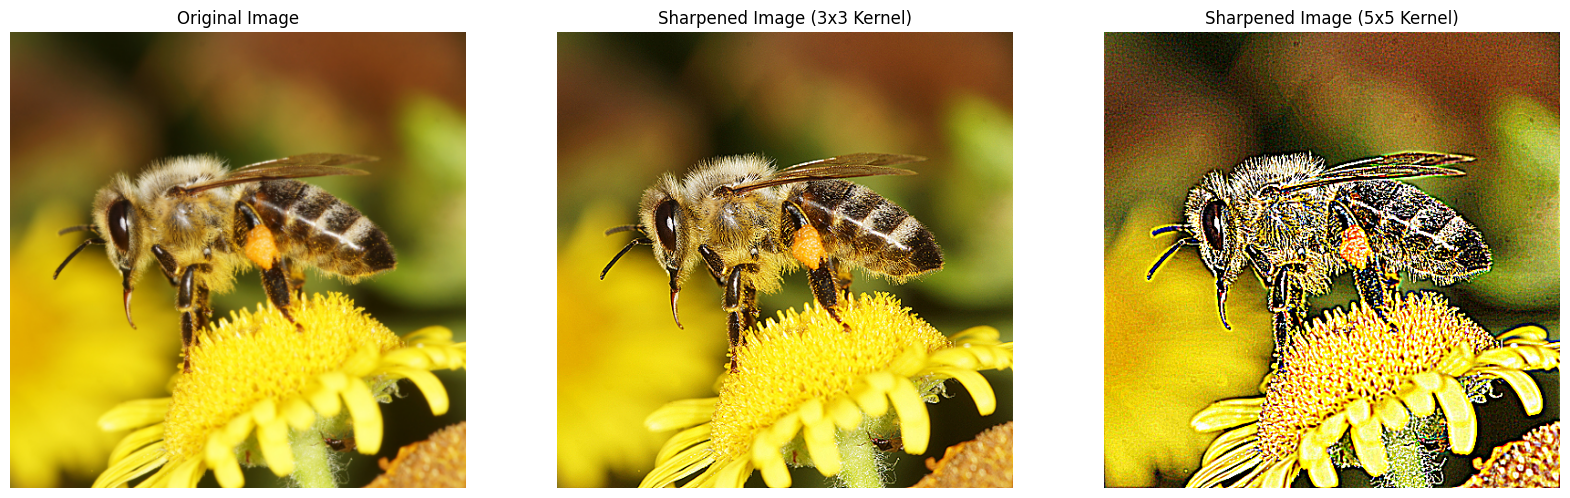

In [6]:
# Exercise 1

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def display_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()

# Load the image
image_path = 'images/native-bee.png'
img = cv.imread(image_path)

# Define the kernels
kernel_3x3 = np.array([[0, -1, 0], 
                       [-1, 5, -1], 
                       [0, -1, 0]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1], 
                       [-1, -1, -1, -1, -1], 
                       [-1, -1, 25, -1, -1], 
                       [-1, -1, -1, -1, -1], 
                       [-1, -1, -1, -1, -1]])

# Apply the kernels to the image
sharp_img_3x3 = cv.filter2D(img, -1, kernel_3x3)
sharp_img_5x5 = cv.filter2D(img, -1, kernel_5x5)

# Display the original and sharpened images
display_images([img, sharp_img_3x3, sharp_img_5x5], ["Original Image", 
                                                     "Sharpened Image (3x3 Kernel)", 
                                                     "Sharpened Image (5x5 Kernel)"])

# The larger the kernel size, the stronger the sharpening effect.
# The stronger the sharpening effect, the more noise and artifacts are introduced.

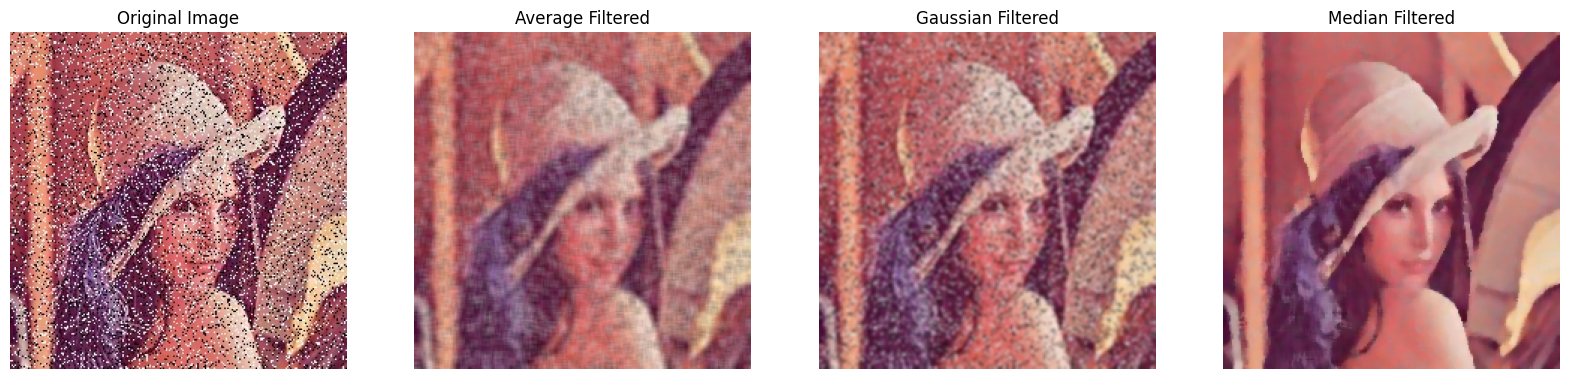

In [7]:
# Exercise 2

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def display_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()

# Load the image
image_path = 'images/noise_lena.jpg'
img = cv.imread(image_path)

# Apply Average Filtering
average_filtered = cv.blur(img, (5, 5))

# Apply Gaussian Filtering
gaussian_filtered = cv.GaussianBlur(img, (5, 5), 0)

# Apply Median Filtering
median_filtered = cv.medianBlur(img, 5)

# Display the original and filtered images
display_images([img, average_filtered, gaussian_filtered, median_filtered], 
               ["Original Image", "Average Filtered", "Gaussian Filtered", "Median Filtered"])

# Quality: Median filter > Average filter > Gaussian filter > Original filter

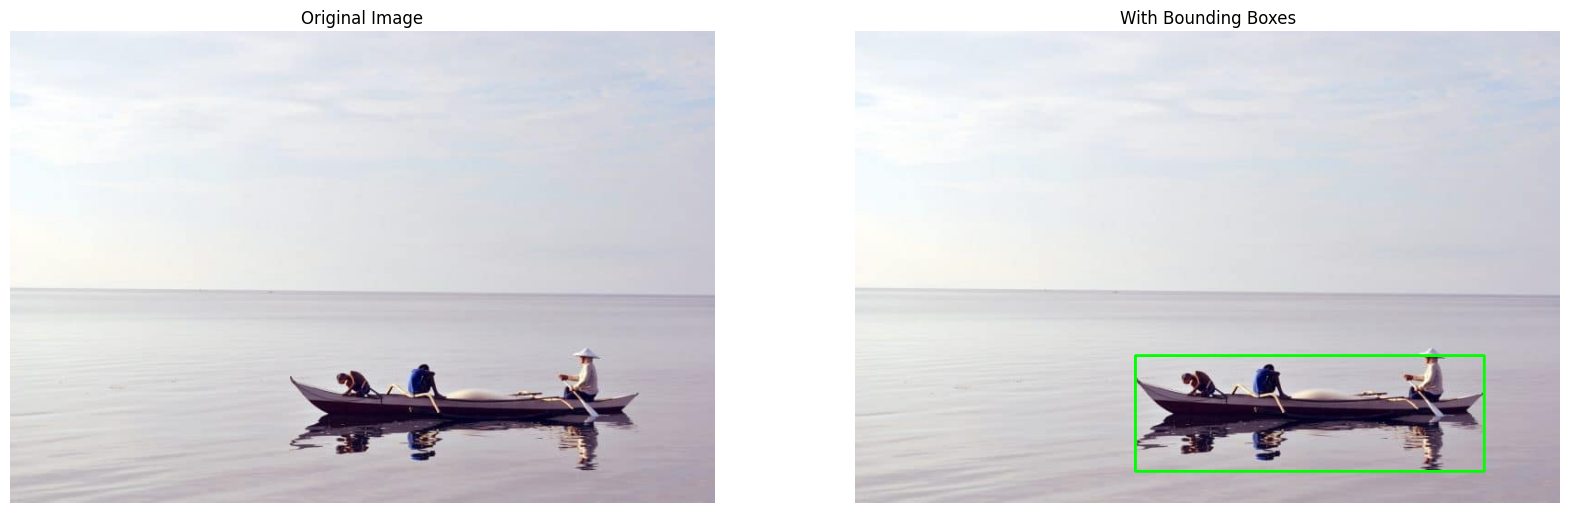

In [31]:
# Exercise 3

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def display_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()

# Load the image
image_path = 'images/boat.jpg'  # Replace this with the path to your image
img = cv.imread(image_path)
img_copy = img.copy()

# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
_, binary = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)

# Find contours
contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Find the largest contour based on area
if contours:
    largest_contour = max(contours, key=cv.contourArea)

    x, y, w, h = cv.boundingRect(largest_contour)
    cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the original image with bounding boxes
display_images([img, img_copy], ["Original Image", "With Bounding Boxes"])
